<a href="https://colab.research.google.com/github/Palak0505bhatt/Zomato-data-analysis/blob/main/zomato_data_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# **Load Dataset**

In [24]:
df = pd.read_csv("/content/zomato.csv")
print(df.head())
print(df.columns)
print(df['online_order'].unique())

                                                 url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5  

# **Clean the Data**

In [25]:
df.drop_duplicates(inplace=True)
df['rate'] = df['rate'].astype(str)
df = df[df['rate'] != 'NEW']
df['rate'] = df['rate'].apply(lambda x: x.replace('/5', '').replace('-', '').strip())
df['rate'] = df['rate'].replace('', '0')
df['rate'] = df['rate'].astype(float)
df['rate'] = df['rate'].fillna(df['rate'].mode()[0])
df.dropna(inplace=True)

df['online_order'] = df['online_order'].map({'Yes': 1, 'No': 0})
df['book_table'] = df['book_table'].map({'Yes': 1, 'No': 0})

print("First 5 rows:\n", df.head())
print("\nData types:\n", df.dtypes)
print("\nNull values in each column:\n", df.isnull().sum())
print("\nSummary statistics:\n", df.describe())



First 5 rows:
                                                  url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

   online_order  book_table  rate  votes                             phone  \
0             1           1   4.1    775    080 42297555\r\n+91 9743772233   
1             1  

<ipython-input-25-e8b095cff541>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-25-e8b095cff541>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-25-e8b095cff541>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-25-e8b095c

# **Handling Outliers in 'rate'**

In [26]:
Q1 = df['rate'].quantile(0.25)
Q3 = df['rate'].quantile(0.75)
IQR = Q3 - Q1
before = df.shape[0]
df = df[(df['rate'] >= Q1 - 1.5 * IQR) & (df['rate'] <= Q3 + 1.5 * IQR)]
after = df.shape[0]
print(f"Outliers removed: {before - after}")


Outliers removed: 1827


# **Summary Statistics**

In [27]:
df.describe()


,online_order,book_table,rate,votes
count,21248.000000,21248.000000,21248.000000,21248.000000
mean,0.711455,0.280779,3.992620,631.922534
std,0.453096,0.449390,0.287828,1117.463832
min,0.000000,0.000000,3.200000,0.000000
25%,0.000000,0.000000,3.800000,109.000000
50%,1.000000,0.000000,4.000000,238.000000
75%,1.000000,1.000000,4.200000,654.000000
max,1.000000,1.000000,4.800000,14956.000000


**Correlation matrix**

In [28]:
cols = ['rate', 'votes', correct_cost_col]
if all(col in df.columns for col in cols):

    corr = df[cols].corr()
    plt.figure(figsize=(6, 4))
    sns.heatmap(corr, annot=True, cmap='Blues')
    plt.title('Correlation Matrix')
    plt.show()
else:
    print(f"Error: Not all required columns {cols} found in DataFrame.")





ValueError: could not convert string to float: '1,200'

# **Heatmap**

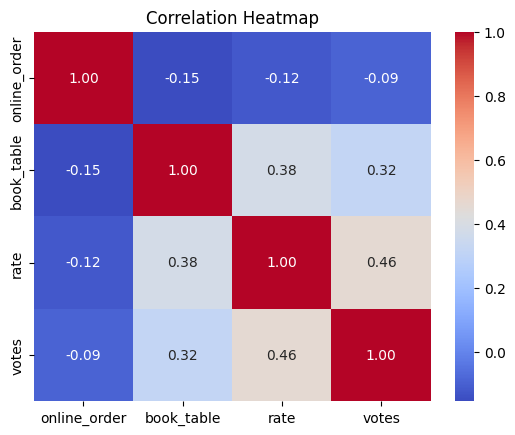

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



# **Data Visualizations**
**a. Rating Distribution**

In [30]:
df = df_original.copy()
df['rate'] = df['rate'].astype(str).str.extract(r'(\d+\.?\d*)')[0]
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')
df = df.dropna(subset=['rate'])
print("Number of valid ratings:", len(df))
print("Unique ratings sample:", df['rate'].unique()[:10])

# Plot with seaborn
plt.figure(figsize=(8, 4))
sns.histplot(df['rate'], kde=True, color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Plot with Plotly Express
import plotly.express as px
fig = px.histogram(df, x='rate', nbins=30, title='Distribution of Ratings',
                   labels={'rate': 'Rating'},
                   color_discrete_sequence=['skyblue'])
fig.update_layout(xaxis_title='Rating', yaxis_title='Count', template='plotly_white')
fig.show()


NameError: name 'df_original' is not defined

# **b. Online Order Pie Chart**

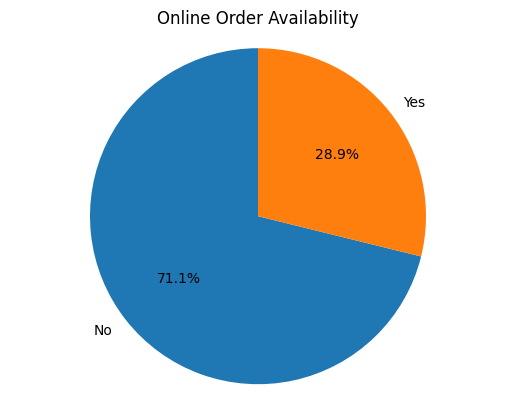

In [32]:
labels = ['No', 'Yes']
values = df['online_order'].value_counts()
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Online Order Availability')
plt.axis('equal')
plt.show()


# **c. Top 10 Cuisines**

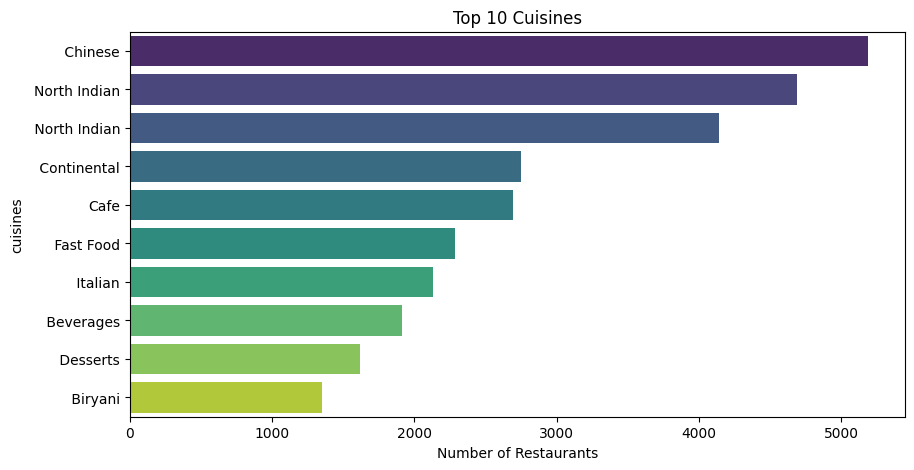

In [31]:
df['cuisines'] = df['cuisines'].astype(str)
cuisines_series = df['cuisines'].str.split(',').explode()
top_cuisines = cuisines_series.value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='viridis', hue=top_cuisines.index, legend=False)
plt.title('Top 10 Cuisines')
plt.xlabel('Number of Restaurants')
plt.show()


# **d. Interactive: Votes vs Rating**

In [33]:
import plotly.express as px
required_cols = ['rate', 'votes', 'approx_cost(for two people)', 'online_order', 'name', 'location']
missing_cols = [col for col in required_cols if col not in df.columns]
if missing_cols:
    print(f"Missing columns: {missing_cols}")

df['rate'] = pd.to_numeric(df['rate'], errors='coerce')
df['votes'] = pd.to_numeric(df['votes'], errors='coerce')
df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'], errors='coerce')

df_clean = df.dropna(subset=['rate', 'votes', 'approx_cost(for two people)', 'online_order'])

df_clean['online_order'] = df_clean['online_order'].astype(str)

fig = px.scatter(df_clean,
                 x='rate',
                 y='votes',
                 size='approx_cost(for two people)',
                 color='online_order',
                 hover_data=['name', 'location'],
                 title='Votes vs Rating')

fig.show()



<ipython-input-33-d37aab163087>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# **e. Interactive: Cost vs Rating**

In [34]:
fig = px.scatter(df, x='rate', y='approx_cost(for two people)',
                 size='votes', color='book_table',
                 hover_data=['name', 'location', 'cuisines'],
                 title='Cost vs Rating (Bubble Plot)')
fig.show()


# **Top Restaurants**

In [35]:
import plotly.express as px

top_restaurants = df.groupby('name')['votes'].sum().sort_values(ascending=False).head(10).reset_index()
fig = px.bar(
    top_restaurants,
    x='name',
    y='votes',
    title='Top 10 Restaurants by Votes',
    labels={'name': 'Restaurant Name', 'votes': 'Total Votes'},
    color='votes'
)
fig.update_layout(xaxis_tickangle=-45)
fig.show()


# **Data Insights Summary**
**Rating Distribution**: Most restaurants are rated between 3.0 and 4.5, showing generally positive customer reviews.

**Online Ordering:** About 40% offer online orders, highlighting the shift to digital food delivery.

**Top Cuisines:** North Indian, Chinese, and South Indian are the most popular cuisines in Bangalore.

**Votes vs Ratings:** Higher-rated restaurants tend to receive more votes, indicating stronger customer engagement.

**Cost vs Rating:** Higher-rated restaurants usually have higher costs and often provide table booking.

* These findings help understand customer preferences, pricing, and service trends in Bangalore’s restaurant industry.